In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
titanic["class"].unique()
titanic["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [53]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [54]:
titanic.drop(columns="deck", inplace=True)

In [55]:
# att göra de tomma till Southampton
#titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace=True)

# Att ta bort de två som inte hade en embark_town
titanic.dropna(subset=["embark_town"], inplace=True)

titanic["embark_town"].value_counts()


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [62]:
median_age_male = titanic.query("sex==`male`")["age"].median()
median_age_female = titanic.query("sex==`female`")["age"].median()

# Varför funkar det ej?

UndefinedVariableError: name 'male' is not defined

<Axes: xlabel='age', ylabel='Count'>

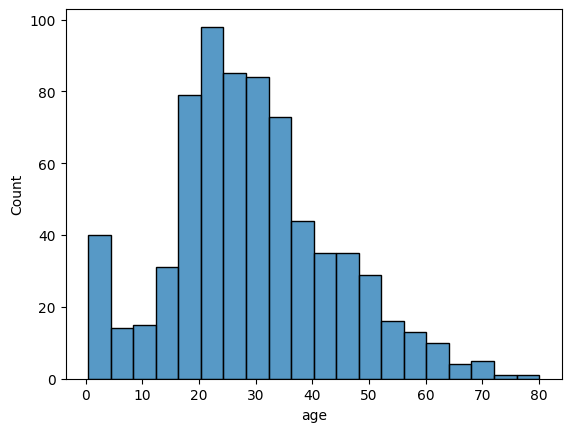

In [59]:
sns.histplot(titanic["age"])